# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

### Carregamento dos pacotes necessários 
Os pacotes necessários para esta tarefa são:
- Pandas para leitura e modificação dos dados;
- Numpy que permite operações matemáticas;
- Matplotlib.pyplot para a geração de gráficos;
- seaborn para visualização de gráficos estatísticos.

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Carregamento da base de dados

In [63]:
# URL da base de dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

# Cria a tabela com os dados presentes na URL, e nomeia as colunas de acordo com a variável
df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

# Mostra as 5 primeiras linhas da tabela
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Neste exercicío nos interessa saber se a pessoa registrada tem ou não alguma doença, não importando qual é a doença em si. Assim, para facilitar a análise, vamos criar uma nova coluna booleana 'flag_doente', onde tem o valor zero se a pessoa é saudável, e 1 se a pessoa tem alguma doença cardíaca.

In [64]:
# Cria uma nova coluna onde especifica se a pessoa está doente ou não
df['flag_doente'] = (df['num'] != 0).astype('int64')

# Mostra a tabela com a nova coluna
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

Inicialmente, vamos montar a tabela cruzada entre as colunas 'sex' e 'flag_doente', onde encontram-se o número de pessoas doentes e saudáveis de acordo com o sexo.

In [65]:
# Tabela cruzada entre as variáveis 'sex' e 'flag_doente'
bivariada_sexo = pd.crosstab(index=df['sex'], columns=df['flag_doente'], margins=True)

# Mostra a tabela
bivariada_sexo

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


Do enunciado, sabemos que a variável 'sex' é zero se a pessoa é do sexo feminino, e 1 se for do sexo masculino. No caso da variável 'flag_doente', ela é 0 se a pessoa é saudável e 1 se ela tem alguma doença. Para facilita a análise desses dados, vamos substituir os nomes das linhas e colunas da tabela cruzada por suas especificações. 

In [66]:
# Nomes para as colunas
colunas = {0: 'Saudável', 1:'Doente', 'All': 'Total'}

# Nomes para as linhas
linhas = {0: 'Feminino', 1: 'Masculino', 'All': 'Ambos'}

# Substitui os nomes das linhas e colunas da tabela
bivariada_sexo = bivariada_sexo.rename(columns=colunas, index=linhas)

# Mostra a tabela 
bivariada_sexo

flag_doente,Saudável,Doente,Total
sex,,,
Feminino,72,25,97
Masculino,92,114,206
Ambos,164,139,303


Agora que está mais fácil de analisar a tabela, vejamos a média de doentes por sexo.

In [67]:
# Adiciona a coluna com a quantidade média de doentes (porcentagem de doentes em cada linha)
bivariada_sexo['média doentes'] = bivariada_sexo['Doente']/bivariada_sexo['Total'] 

# Mostra a tabela
bivariada_sexo

flag_doente,Saudável,Doente,Total,média doentes
sex,,,,
Feminino,72,25,97,0.257732
Masculino,92,114,206,0.553398
Ambos,164,139,303,0.458746


Além da média, vejamos qual a chance de uma pessoa estar doente de acordo com o sexo dela.

In [68]:
# Chance de uma pessoa ter alguma doença em cada linha
bivariada_sexo['Odds (doentes)'] = bivariada_sexo['Doente']/bivariada_sexo['Saudável']

# Mostra a tabela
bivariada_sexo

flag_doente,Saudável,Doente,Total,média doentes,Odds (doentes)
sex,,,,,
Feminino,72,25,97,0.257732,0.347222
Masculino,92,114,206,0.553398,1.239130
Ambos,164,139,303,0.458746,0.847561


Tendo montado a coluna com as chances de uma pessoa ser doente, calculemos a taxa de chance de uma pessoa ser doente em relação ao total.

In [69]:
# Razão de chances em relação ao total
bivariada_sexo['RC vs total'] = bivariada_sexo['Odds (doentes)']/bivariada_sexo.loc['Ambos', 'Odds (doentes)']

# Mostra a tabela
bivariada_sexo

flag_doente,Saudável,Doente,Total,média doentes,Odds (doentes),RC vs total
sex,,,,,,
Feminino,72,25,97,0.257732,0.347222,0.409672
Masculino,92,114,206,0.553398,1.239130,1.461996
Ambos,164,139,303,0.458746,0.847561,1.000000


Cálculo do logaritmo da chance de uma pessoa estar doente.

In [70]:
# Coluna com o log(Chances)
bivariada_sexo['Log(Odds)'] = np.log(bivariada_sexo['Odds (doentes)'])

# Mostra a tabela
bivariada_sexo

flag_doente,Saudável,Doente,Total,média doentes,Odds (doentes),RC vs total,Log(Odds)
sex,,,,,,,
Feminino,72,25,97,0.257732,0.347222,0.409672,-1.057790
Masculino,92,114,206,0.553398,1.239130,1.461996,0.214410
Ambos,164,139,303,0.458746,0.847561,1.000000,-0.165392


Valores do logaritmo da taxa de chances de uma pessoa estar doente.

In [71]:
# Coluna com o logaritmo da razão de chances (WOE)
bivariada_sexo['WOE'] = np.log(bivariada_sexo['RC vs total'])

# Mostra a tabela
bivariada_sexo

flag_doente,Saudável,Doente,Total,média doentes,Odds (doentes),RC vs total,Log(Odds),WOE
sex,,,,,,,,
Feminino,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
Masculino,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
Ambos,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

Categorização da variável 'age' (idade) em 5 grupos.

In [72]:
# Divide a variável 'age' em 5 grupos  
grupos_idade = pd.qcut(x=df['age'], q=5)

# mostra a quantidade de pessoas em cada grupo
grupos_idade.value_counts()

(53.0, 58.0]      71
(45.0, 53.0]      64
(28.999, 45.0]    63
(62.0, 77.0]      60
(58.0, 62.0]      45
Name: age, dtype: int64

As faixas de idade mostram que os pacientes tem entre 29 e 77 anos, sendo que a faixa de idade predominante é de 54 a 58 anos. A partir disso, montemos a tabela cruzada das variáveis 'flag_doente' e 'age'.

In [73]:
# Tabela cruzada onde o índice é a faixa de idade e as colunas especificam os que estão doentes ou não
bivariada_idade = pd.crosstab(index=grupos_idade, columns=df['flag_doente'], margins=True)

# Mostra a tabela
bivariada_idade

flag_doente,0,1,All
age,,,
"(28.999, 45.0]",47,16,63
"(45.0, 53.0]",42,22,64
"(53.0, 58.0]",32,39,71
"(58.0, 62.0]",13,32,45
"(62.0, 77.0]",30,30,60
All,164,139,303


Tal como foi na tabela cruzada da 'flag_doente' com 'sex', vamos especificar da uma das colunas da nova tabela cruzada.

In [74]:
# Nomes para as colunas
colunas = {0: 'Saudável', 1:'Doente', 'All': 'Total'}

# Nomes para as linhas
linhas = {'All': 'Todos'}

# Substitui os nomes das linhas e colunas da tabela
bivariada_idade = bivariada_idade.rename(columns=colunas, index=linhas)

# Mostra a tabela 
bivariada_idade

flag_doente,Saudável,Doente,Total
age,,,
"(28.999, 45.0]",47,16,63
"(45.0, 53.0]",42,22,64
"(53.0, 58.0]",32,39,71
"(58.0, 62.0]",13,32,45
"(62.0, 77.0]",30,30,60
Todos,164,139,303


Agora que está mais fácil de analisar a tabela, vejamos a média de doentes por faixa de idade.

In [75]:
# Adiciona a coluna com a quantidade média de doentes (porcentagem de doentes em cada linha)
bivariada_idade['média doentes'] = bivariada_idade['Doente']/bivariada_idade['Total'] 

# Mostra a tabela
bivariada_idade

flag_doente,Saudável,Doente,Total,média doentes
age,,,,
"(28.999, 45.0]",47,16,63,0.253968
"(45.0, 53.0]",42,22,64,0.343750
"(53.0, 58.0]",32,39,71,0.549296
"(58.0, 62.0]",13,32,45,0.711111
"(62.0, 77.0]",30,30,60,0.500000
Todos,164,139,303,0.458746


Além da média, vejamos qual a chance de uma pessoa estar doente de acordo com a faixa de idade dela.

In [76]:
# Chance de uma pessoa ter alguma doença em cada linha
bivariada_idade['Odds (doentes)'] = bivariada_idade['Doente']/bivariada_idade['Saudável']

# Mostra a tabela
bivariada_idade

flag_doente,Saudável,Doente,Total,média doentes,Odds (doentes)
age,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426
"(45.0, 53.0]",42,22,64,0.343750,0.523810
"(53.0, 58.0]",32,39,71,0.549296,1.218750
"(58.0, 62.0]",13,32,45,0.711111,2.461538
"(62.0, 77.0]",30,30,60,0.500000,1.000000
Todos,164,139,303,0.458746,0.847561


Tendo montado a coluna com as chances de uma pessoa ser doente, calculemos a taxa de chance de uma pessoa ser doente em relação ao total.

In [77]:
# Razão de chances em relação ao total
bivariada_idade['RC vs total'] = bivariada_idade['Odds (doentes)']/bivariada_idade.loc['Todos', 'Odds (doentes)']

# Mostra a tabela
bivariada_idade

flag_doente,Saudável,Doente,Total,média doentes,Odds (doentes),RC vs total
age,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856
Todos,164,139,303,0.458746,0.847561,1.000000


Cálculo do logaritmo da chance de uma pessoa estar doente.

In [78]:
# Coluna com o log(Chances)
bivariada_idade['Log(Odds)'] = np.log(bivariada_idade['Odds (doentes)'])

# Mostra a tabela
bivariada_idade

flag_doente,Saudável,Doente,Total,média doentes,Odds (doentes),RC vs total,Log(Odds)
age,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000
Todos,164,139,303,0.458746,0.847561,1.000000,-0.165392


Valores do logaritmo da taxa de chances de uma pessoa estar doente.

In [79]:
# Coluna com o logaritmo da razão de chances (WOE)
bivariada_idade['WOE'] = np.log(bivariada_idade['RC vs total'])

# Mostra a tabela
bivariada_idade

flag_doente,Saudável,Doente,Total,média doentes,Odds (doentes),RC vs total,Log(Odds),WOE
age,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392
Todos,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


Por fim, vejamos quais as médias de idade de cada faixa de idade. 

In [80]:
# Obtém a média das idades de cada grupo
bivariada_idade['média idade'] = df.groupby(by=pd.qcut(x=df['age'],q=5)).mean()['age']

# Obtém a média do total de idades
bivariada_idade.loc['Todos', 'média idade'] = df['age'].mean()

# Mostra a tabela
bivariada_idade

flag_doente,Saudável,Doente,Total,média doentes,Odds (doentes),RC vs total,Log(Odds),WOE,média idade
age,,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166,41.222222
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235,50.000000
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218,56.211268
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179,60.355556
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392,66.516667
Todos,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000,54.438944


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

Com ambas as tabelas prontas, vejamos graficamente quais os números de saudáveis e doentes, além da média de doentes, chance de alguém estar doente e taxa de chances para cada variável.

Começando pelo sexo da pessoa.

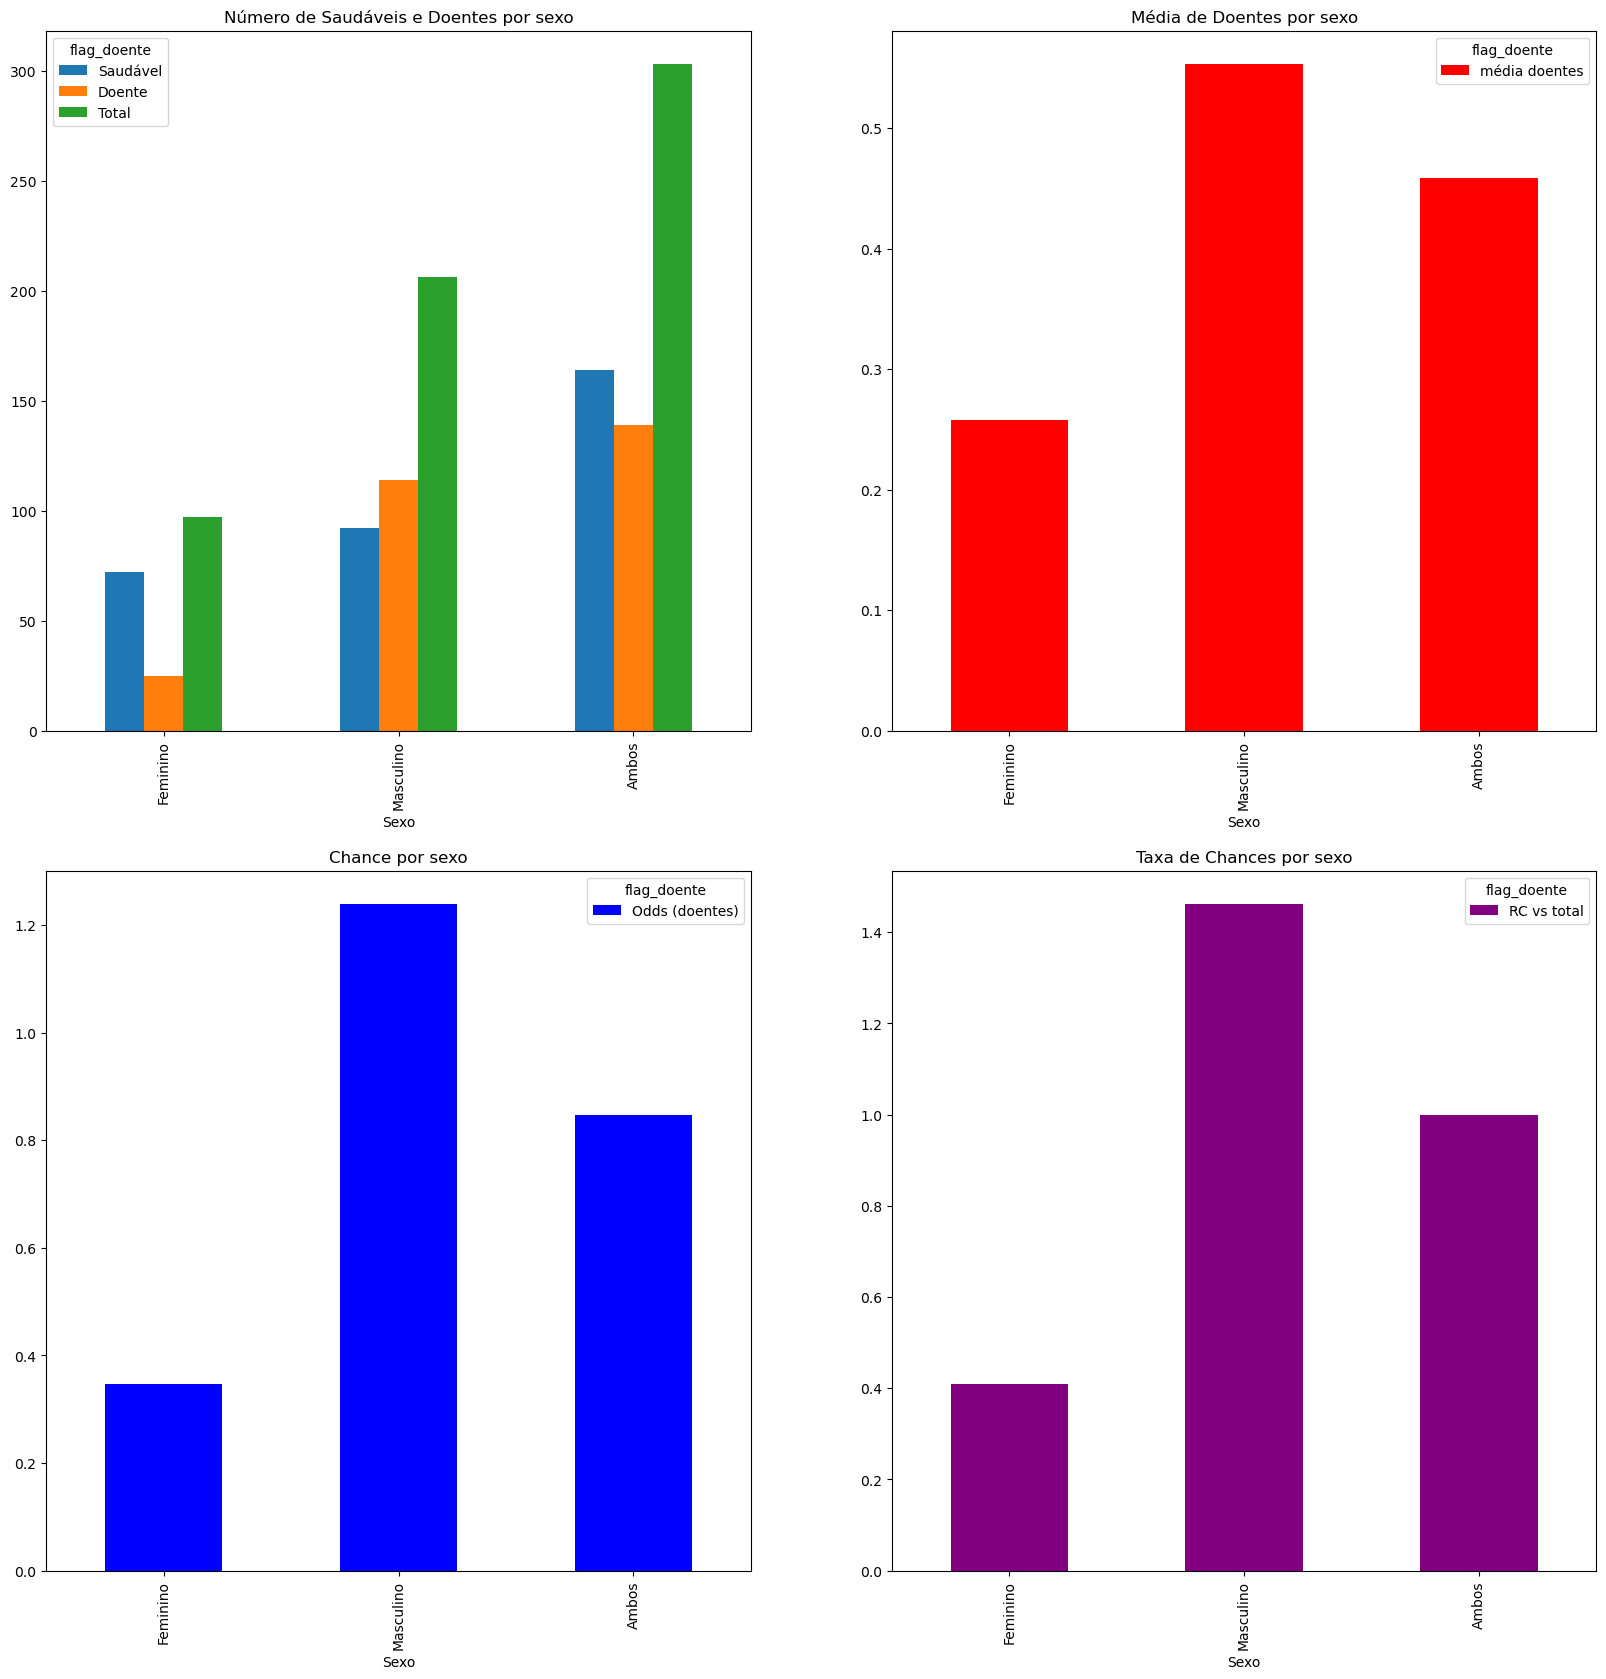

In [81]:
# Cria uma figura onde estarão os 4 gráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

# Separam as colunas da tabela 'sexo' necessárias para cada gráfico
contagem1 = bivariada_sexo[['Saudável', 'Doente', 'Total']]
media1 = bivariada_sexo[['média doentes']]
odds1 = bivariada_sexo[['Odds (doentes)']]
RC1 = bivariada_sexo[['RC vs total']]


# Gráficos de acordo com o sexo

# Gráfico com os números de saudáveis e de doentes 
cont1 = contagem1.plot.bar(ax=axes[0,0])
cont1.set_title(label='Número de Saudáveis e Doentes por sexo')
cont1.set_xlabel(xlabel='Sexo')

# Gráfico com a média de doentes
md1 = media1.plot.bar(ax=axes[0,1], color='red')
md1.set_title(label='Média de Doentes por sexo')
md1.set_xlabel(xlabel='Sexo')

# Gráfico com as chances de uma pessoa ser doente
od1 = odds1.plot.bar(ax=axes[1,0], color='blue')
od1.set_title(label='Chance por sexo')
od1.set_xlabel(xlabel='Sexo')

# Gráfico com a taxa de chances em relação ao total 
rc1 = RC1.plot.bar(ax=axes[1,1], color='purple')
rc1.set_title(label='Taxa de Chances por sexo')
rc1.set_xlabel(xlabel='Sexo')

# Mostra os gráficos
plt.show()

Os gráficos mostram que há um predomínio de pessoas doentes do sexo masculino. No caso do sexo feminino, o número de pessoas saudáveis é quase 5 vezes maior do que o de pessoas doentes.

Agora, vejamos os mesmos gráficos, mas para as faixas de idade.

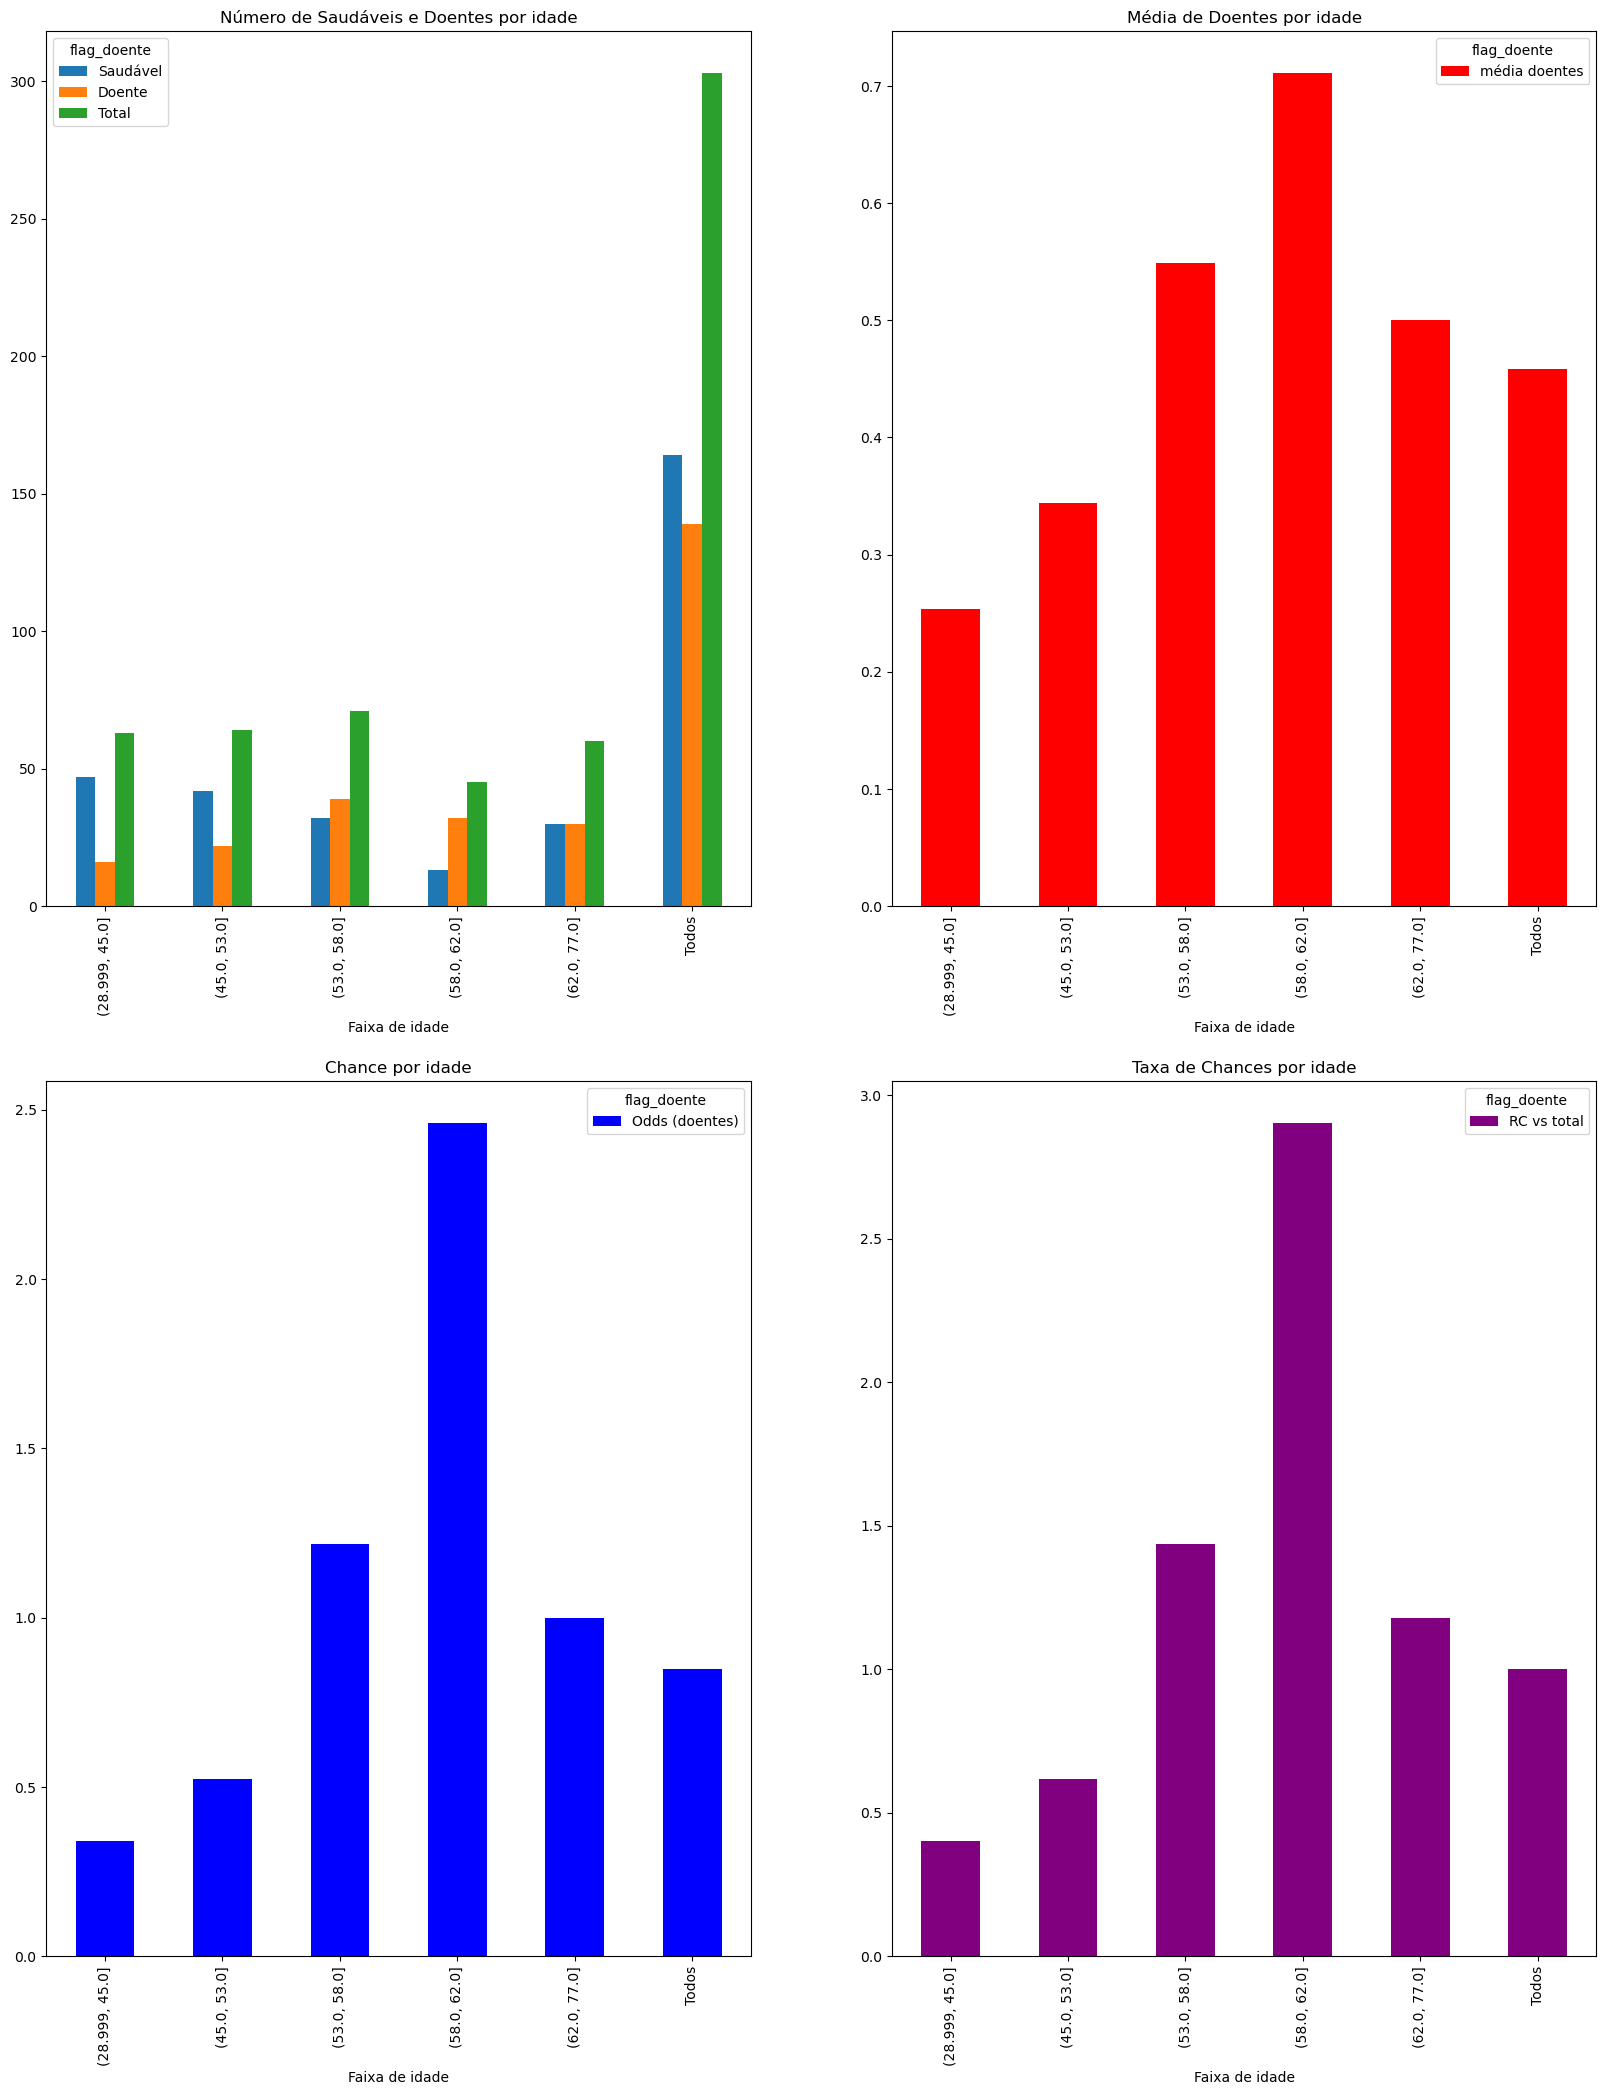

In [82]:
# Cria uma figura onde estarão os 4 gráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 25))

# Separam as colunas da tabela 'sexo' necessárias para cada gráfico
contagem2 = bivariada_idade[['Saudável', 'Doente', 'Total']]
media2 = bivariada_idade[['média doentes']]
odds2 = bivariada_idade[['Odds (doentes)']]
RC2 = bivariada_idade[['RC vs total']]


# Gráficos de acordo com as faixas de idade

# Gráfico com os números de saudáveis e de doentes 
cont2 = contagem2.plot.bar(ax=axes[0,0])
cont2.set_title(label='Número de Saudáveis e Doentes por idade')
cont2.set_xlabel(xlabel='Faixa de idade')

# Gráfico com a média de doentes
md2 = media2.plot.bar(ax=axes[0,1], color='red')
md2.set_title(label='Média de Doentes por idade')
md2.set_xlabel(xlabel='Faixa de idade')

# Gráfico com as chances de uma pessoa ser doente
od2 = odds2.plot.bar(ax=axes[1,0], color='blue')
od2.set_title(label='Chance por idade')
od2.set_xlabel(xlabel='Faixa de idade')

# Gráfico com a taxa de chances em relação ao total 
rc2 = RC2.plot.bar(ax=axes[1,1], color='purple')
rc2.set_title(label='Taxa de Chances por idade')
rc2.set_xlabel(xlabel='Faixa de idade')

# Mostra os gráficos
plt.show()

A maior parte das pessoas com alguma doença cardíaca tem idade entre 58 e 62 anos.